In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
x = pd.read_table("x.dat", sep="\s+")
y = pd.read_table("y.dat", sep="\s+")

In [3]:
x.iloc[0]=[float(x.columns[i]) for i in range(len(x.columns))]
x.columns=[i for i in range(len(x.columns))]
y.iloc[0]=[float(y.columns[i]) for i in range(len(y.columns))]
y.columns=[i for i in range(len(y.columns))]
a=pd.DataFrame()
print(x.head())
print('\n')
print(y.head())

          0         1
0 -0.347926  0.862573
1 -0.034562  0.289474
2 -0.149770  0.073099
3 -0.352535 -0.160819
4 -0.430876 -0.517544


     0
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0


In [4]:
#plt.scatter(x[0],x[1],c=y)
x0=np.ones(x.shape[0])
x['intercept']=x0
col=x.columns.tolist()
col=col[-1:]+col[:-1]
x=x[col]
x

,intercept,0,1
0,1.0,-0.347926,0.862573
1,1.0,-0.034562,0.289474
2,1.0,-0.149770,0.073099
3,1.0,-0.352535,-0.160819
4,1.0,-0.430876,-0.517544
...,...,...,...
63,1.0,-0.306452,-0.687134
64,1.0,-0.006912,-0.464912
65,1.0,-0.080645,-0.236842
66,1.0,0.126728,-0.581871


In [141]:
def lwr(X, Y, x, tau, lamda=0.0001):#locally weighted logistic regression
    m=len(Y)
    n=X.shape[1]
    w=np.zeros((m,1))
    teta=np.zeros((n,1))
    z=np.zeros((m,1))
    D=np.zeros((m,m))
    gradl=np.ones((n,1))
    H=np.zeros((n,n))
#     print(w)
    w=np.exp(-np.einsum('ij,ij->i',X-x,X-x)/(2*tau*tau)) #produit scalaire de toutes les vecteurs lignes
    w=np.array(w).reshape((w.shape[0],1)) #return to a column vector 68,1
    while(np.linalg.norm(gradl)>np.exp(-6)):
        h=1/(1+np.exp(-X.dot(teta))) #this is our sigmoid function vecteor of 68,1
        z=w*(Y-h)
        D=np.diag((-w*h*(1-h))[:,0])
        gradl=X.T.dot(z)-lamda*teta
        H=X.T.dot(D).dot(X)- lamda*np.eye(n)
        teta=teta- np.linalg.inv(H).dot(gradl)
    return float(x.dot(teta)>0.0) #same if h(x)>0.5

In [77]:
def plotresul(X,Y,res,tau):
    m=len(Y)
    n=X.shape[1]
    x = np.ones((n,1))
    pred=np.zeros((res,res))
    for i in range(res):
        for j in range(res):
            x[1,0] = 2*(i-1)/(res-1) - 1
            x[2,0] = 2*(j-1)/(res-1) - 1
            pred[i,j] = lwr(X.values, Y.values, x.T, tau)
    return pred

In [181]:
a=x.values-x.values[0,:]
# np.sqrt(np.einsum('ij,ij->i',a,a)[1]) test norm over all rows
# np.linalg.norm(a[1,:] )
# a=np.ones(3)
# print(np.dot(a,x.values[0,:]))
# np.einsum('j,ij->i',a,x)[0]
# print(lwr(x.values,y.values,x.values[64,:],1))
a=np.ones((3,1))
# print(a.shape,x.shape)
# h=1/(1+np.exp(-x.values.dot(a)))
tau=0.01 
w=np.exp(-np.einsum('ij,ij->i',x,x)/(2*tau**2)) #when tau is so low the exponention goes to 0 
w

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

<AxesSubplot:xlabel='0', ylabel='1'>

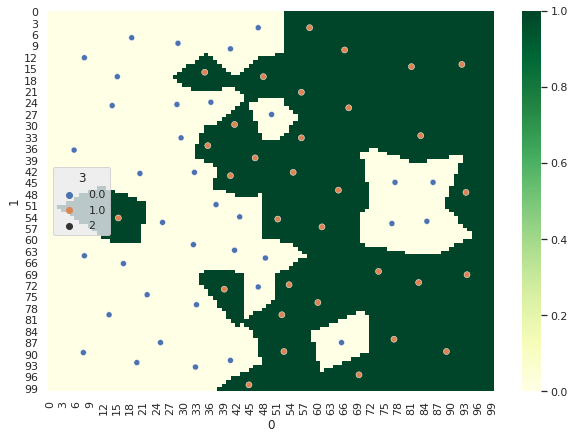

In [172]:
df=[x,y]
df=pd.concat(df)
X=pd.DataFrame.copy(x)
res=100
X=(res/2)*(1+X) +0.5
X[len(x.columns)]=y
# print(X)
H=plotresul(x,y,res,0.01).T #i just assigned the pred[i,j] instead of pred[j,i] in my function above
heatdata=pd.DataFrame(H) #i called it heatdata because am drawing a heat map using seaborn
# print(heatdata)
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(heatdata,cmap="YlGn")
sns.scatterplot(data=X,x=0,y=1,hue=len(X.columns)-1, style=2) #style add x and o

<AxesSubplot:xlabel='0', ylabel='1'>

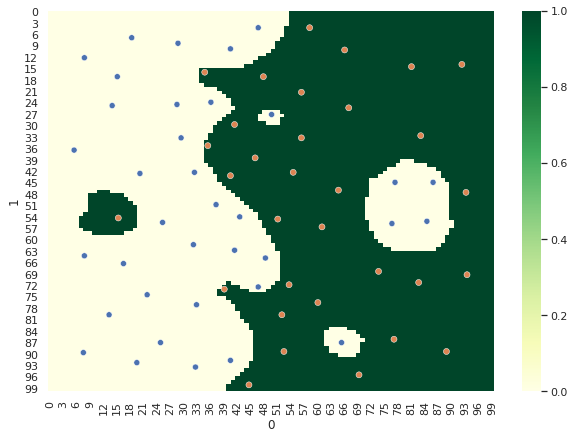

In [175]:
H=plotresul(x,y,res,0.1).T
heatdata=pd.DataFrame(H)
# print(heatdata)
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(heatdata,cmap="YlGn")
sns.scatterplot(data=X,x=0,y=1,hue=len(X.columns)-1, style=2,legend=False) #style add x and o


<AxesSubplot:xlabel='0', ylabel='1'>

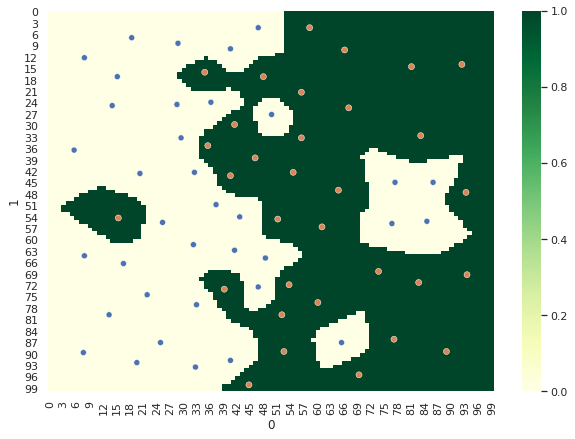

In [176]:
H=plotresul(x,y,res,0.05).T
heatdata=pd.DataFrame(H)
# print(heatdata)
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(heatdata,cmap="YlGn")
sns.scatterplot(data=X,x=0,y=1,hue=len(X.columns)-1, style=2,legend=False) #style add x and o


<AxesSubplot:xlabel='0', ylabel='1'>

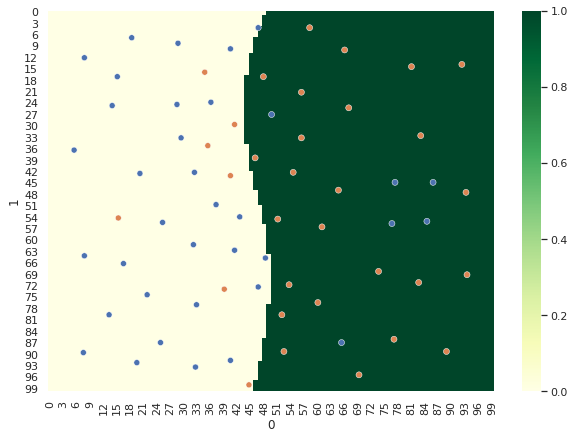

In [177]:
H=plotresul(x,y,res,0.5).T
heatdata=pd.DataFrame(H)
# print(heatdata)
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(heatdata,cmap="YlGn")
sns.scatterplot(data=X,x=0,y=1,hue=len(X.columns)-1, style=2,legend=False) #style add x and o


<AxesSubplot:xlabel='0', ylabel='1'>

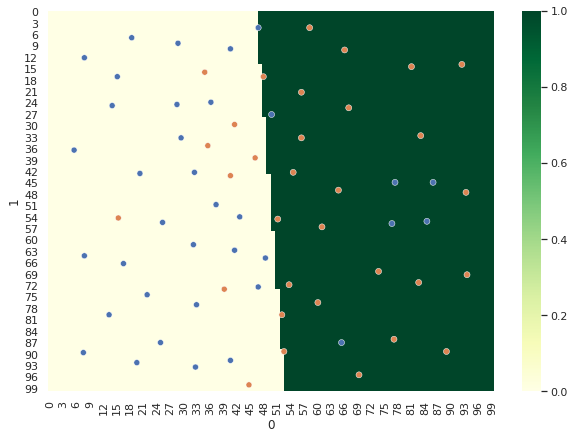

In [178]:
H=plotresul(x,y,res,5).T #when tau is equal to 5 it as if tau goes to +infini which means w=1=>logistic regression
heatdata=pd.DataFrame(H)
# print(heatdata)
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(heatdata,cmap="YlGn")
sns.scatterplot(data=X,x=0,y=1,hue=len(X.columns)-1, style=2,legend=False) #style add x and o
